In [1]:
import numpy as np 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [31]:
flujo_1440 = np.array([2.563304e-2,7.695875e-3,8.930245e-3,1.382427e-2,1.005911e-2,
                      9.270295e-3,9.345345e-3,9.954659e-2,3.233186e-2,2.520444e-2,
                       2.135941e-2,7.828631e-3,5.919128e-3,9.008171e-3,4.154634e-2,
                      7.471446e-3,3.910195e-2,1.350730e-2,1.701970e-2, 7.642501e-3,
                      2.154599e-2,8.162911e-3,6.484435e-3,5.771428e-3,8.899262e-3,
                      1.182786e-2,2.032665e-2,1.456524e-2,2.088907e-2,7.714548e-3,
                      3.375700e-2])

flujo_1820 = np.array([1.649318e-2,5.959107e-3,7.257759e-3,1.144259e-2,7.400428e-3,
                      7.257759e-3,7.846296e-3,7.474513e-2,2.470658e-2,1.668240e-2,
                      1.723189e-2,6.231646e-3,5.003725e-3,6.137143e-3,3.143073e-2,
                      5.331180e-3,2.648675e-2,8.479499e-3,1.049409e-2,7.061315e-3,
                       1.801840e-2,5.919319e-3,5.326200e-3,4.054078e-3,5.857486e-3,
                      9.363288e-3,1.325073e-2,1.130215e-2,1.534263e-2,5.555640e-3,
                      2.963577e-2])


flujo_1884 = np.array([1.39253e-2,5.241487e-3,6.532229e-3,8.456416e-3,7.182916e-3,
                     6.838539e-3,8.065056e-3,6.636568e-2,2.022300e-2,1.355154e-2,
                     1.592079e-2,6.884250e-3,3.862787e-3,5.852052e-3,2.870218e-2,
                     5.485902e-3,2.324763e-2,7.422613e-3,9.367680e-3,6.113977e-3,
                     1.702568e-2,6.097734e-3,5.415275e-3,4.350812e-3,7.024690e-3,
                     8.742325e-3,1.197843e-2,9.459618e-3,1.385373e-2,6.181762e-3,
                     2.841562e-2])

Freq = np.array([1440,1820,1884])

# Ley de potencias 
def ley_pot(x,alpha): 
    f = x**alpha
    return f

alpha = []
error = []
for i in range(len(flujo_1884)):
    f = np.array([flujo_1440[i], flujo_1820[i], flujo_1884[i]])
    popt, pcov = curve_fit(ley_pot, Freq, f)
    alpha += [popt[0]]
    error += [(pcov[0]**0.5)[0]]

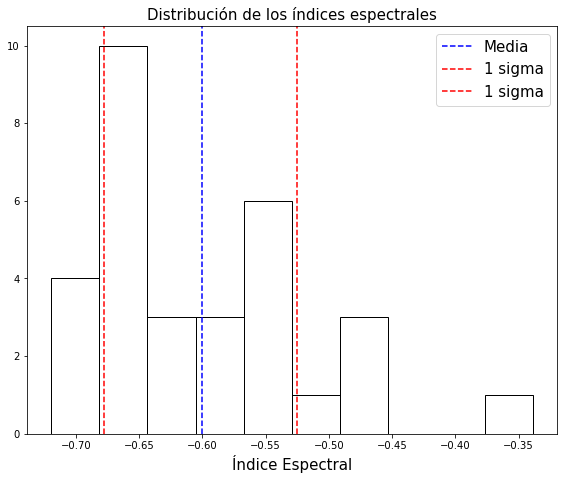

In [105]:
plt.figure(figsize=(9.5,7.5))

n,bins,patches = plt.hist(alpha,fill=False)
plt.axvline(x=np.mean(alpha),linestyle='--', color='blue', label='Media')
plt.axvline(x=np.percentile(alpha,16),linestyle='--', color='red', label='1 sigma')
plt.axvline(x=np.percentile(alpha,84),linestyle='--', color='red', label='1 sigma')
plt.xlabel('Índice Espectral',fontsize=15)
plt.title('Distribución de los índices espectrales',fontsize=15)
plt.legend(fontsize=15)
plt.savefig("distribucion.jpg",dpi=420,bbox_inches='tight')

In [44]:
print(np.mean(alpha), np.median(alpha), np.percentile(alpha,16),
      np.percentile(alpha,84), np.mean(error))

-0.600389125299417 -0.6204894053307151 -0.6779663339140273 -0.5252281946652766 0.009449307591993654


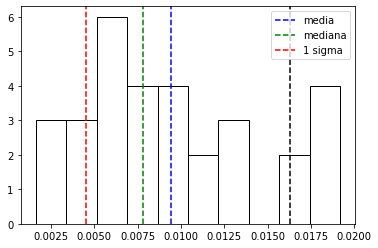

In [45]:
n,bins,patches = plt.hist(error,fill=False)
plt.axvline(x=np.mean(error),linestyle='--', color='blue', label='media')
plt.axvline(x=np.median(error),linestyle='--', color='green', label='mediana')
plt.axvline(x=np.percentile(error,16),linestyle='--', color='red', label='1 sigma')
plt.axvline(x=np.percentile(error,84),linestyle='--', color='k')

plt.legend()

In [49]:
l = []
for i in range(len(flujo_1820)):
    l += [(flujo_1440[i],flujo_1820[i],flujo_1884[i])]
    
l

[(0.02563304, 0.01649318, 0.0139253),
 (0.007695875, 0.005959107, 0.005241487),
 (0.008930245, 0.007257759, 0.006532229),
 (0.01382427, 0.01144259, 0.008456416),
 (0.01005911, 0.007400428, 0.007182916),
 (0.009270295, 0.007257759, 0.006838539),
 (0.009345345, 0.007846296, 0.008065056),
 (0.09954659, 0.07474513, 0.06636568),
 (0.03233186, 0.02470658, 0.020223),
 (0.02520444, 0.0166824, 0.01355154),
 (0.02135941, 0.01723189, 0.01592079),
 (0.007828631, 0.006231646, 0.00688425),
 (0.005919128, 0.005003725, 0.003862787),
 (0.009008171, 0.006137143, 0.005852052),
 (0.04154634, 0.03143073, 0.02870218),
 (0.007471446, 0.00533118, 0.005485902),
 (0.03910195, 0.02648675, 0.02324763),
 (0.0135073, 0.008479499, 0.007422613),
 (0.0170197, 0.01049409, 0.00936768),
 (0.007642501, 0.007061315, 0.006113977),
 (0.02154599, 0.0180184, 0.01702568),
 (0.008162911, 0.005919319, 0.006097734),
 (0.006484435, 0.0053262, 0.005415275),
 (0.005771428, 0.004054078, 0.004350812),
 (0.008899262, 0.005857486, 0.0070

In [69]:
rms_1440 = np.array([6.105906e-3,2.001490e-3,2.340150e-3,
                    3.651182e-3,3.651182e-3,2.547615e-3,
                    2.420011e-3,2.277046e-2,7.895538e-3,
                    6.257269e-3,4.672344e-3,2.301117e-3,
                    1.820525e-3,2.699166e-3,9.003292e-3,
                    2.214849e-3,9.170773e-3,4.175211e-3,
                    4.803910e-3,2.090816e-3,5.204424e-3,
                    2.344998e-3,1.811207e-3,1.775845e-3,
                    2.857286e-3,2.993636e-3,4.923848e-3,
                    3.571615e-3,4.460105e-3,2.312619e-3,
                    6.997245e-3])

rms_1820 = np.array([4.318787e-3,1.361300e-3,1.620243e-3,
                    2.585042e-3,2.107300e-3,1.620243e-3,
                    1.710567e-3,1.678142e-2,6.180208e-3,
                    4.455195e-3,3.667526e-3,1.499187e-3,
                    1.324132e-3,1.536030e-3,7.370863e-3,
                    1.481455e-3,6.627885e-3,2.300299e-3,
                    2.866674e-3,1.685098e-3,4.525059e-3,
                    1.499393e-3,1.354613e-3,1.145592e-3,
                    1.981624e-3,2.268144e-3,2.144516e-3,
                    2.511826e-3,3.872330e-3,1.574901e-3,
                    6.521691e-3])

rms_1884 = np.array([3.802810e-3,1.290580e-3,1.668031e-3,
                    1.885404e-3,2.002551e-3,2.095448e-3,
                    1.890046e-3,1.473845e-2,5.341098e-3,
                    3.824276e-3,3.304942e-3,1.561771e-3,
                    1.064375e-3,1.519449e-3,6.652642e-3,
                    1.743818e-3,5.884736e-3,1.969618e-3,
                    2.752811e-3,1.322242e-3,4.179879e-3,
                    1.550120e-3,1.253447e-3,1.116075e-3,
                    1.858860e-3,2.156073e-3,2.777936e-3,
                    2.335808e-3,3.491296e-3,1.652746e-3,
                    6.190267e-3])

In [73]:
round(flujo_1440[1],3)

0.008

In [85]:
l = []
for i in range(len(flujo_1820)):
    l += [(round(flujo_1440[i],3),'&',round(rms_1440[i],3),'&',round(flujo_1820[i],3),'&',
           round(rms_1820[i],3),'&',round(flujo_1884[i],3),'&',round(rms_1884[i],3))]

    


In [86]:
l

[(0.026, '&', 0.006, '&', 0.016, '&', 0.004, '&', 0.014, '&', 0.004),
 (0.008, '&', 0.002, '&', 0.006, '&', 0.001, '&', 0.005, '&', 0.001),
 (0.009, '&', 0.002, '&', 0.007, '&', 0.002, '&', 0.007, '&', 0.002),
 (0.014, '&', 0.004, '&', 0.011, '&', 0.003, '&', 0.008, '&', 0.002),
 (0.01, '&', 0.004, '&', 0.007, '&', 0.002, '&', 0.007, '&', 0.002),
 (0.009, '&', 0.003, '&', 0.007, '&', 0.002, '&', 0.007, '&', 0.002),
 (0.009, '&', 0.002, '&', 0.008, '&', 0.002, '&', 0.008, '&', 0.002),
 (0.1, '&', 0.023, '&', 0.075, '&', 0.017, '&', 0.066, '&', 0.015),
 (0.032, '&', 0.008, '&', 0.025, '&', 0.006, '&', 0.02, '&', 0.005),
 (0.025, '&', 0.006, '&', 0.017, '&', 0.004, '&', 0.014, '&', 0.004),
 (0.021, '&', 0.005, '&', 0.017, '&', 0.004, '&', 0.016, '&', 0.003),
 (0.008, '&', 0.002, '&', 0.006, '&', 0.001, '&', 0.007, '&', 0.002),
 (0.006, '&', 0.002, '&', 0.005, '&', 0.001, '&', 0.004, '&', 0.001),
 (0.009, '&', 0.003, '&', 0.006, '&', 0.002, '&', 0.006, '&', 0.002),
 (0.042, '&', 0.009, '&'

In [95]:
k = []
for i in range(len(alpha)):
    k += [('&',round(alpha[i],3),'&',round(error[i],3))]

In [97]:
k

[('&', -0.534, '&', 0.019),
 ('&', -0.681, '&', 0.008),
 ('&', -0.656, '&', 0.005),
 ('&', -0.603, '&', 0.013),
 ('&', -0.645, '&', 0.008),
 ('&', -0.652, '&', 0.005),
 ('&', -0.643, '&', 0.002),
 ('&', -0.339, '&', 0.013),
 ('&', -0.491, '&', 0.013),
 ('&', -0.535, '&', 0.019),
 ('&', -0.539, '&', 0.006),
 ('&', -0.668, '&', 0.004),
 ('&', -0.714, '&', 0.01),
 ('&', -0.666, '&', 0.011),
 ('&', -0.455, '&', 0.01),
 ('&', -0.685, '&', 0.007),
 ('&', -0.472, '&', 0.016),
 ('&', -0.62, '&', 0.018),
 ('&', -0.59, '&', 0.019),
 ('&', -0.669, '&', 0.005),
 ('&', -0.534, '&', 0.004),
 ('&', -0.672, '&', 0.007),
 ('&', -0.694, '&', 0.002),
 ('&', -0.72, '&', 0.007),
 ('&', -0.662, '&', 0.01),
 ('&', -0.619, '&', 0.006),
 ('&', -0.562, '&', 0.016),
 ('&', -0.597, '&', 0.01),
 ('&', -0.55, '&', 0.011),
 ('&', -0.677, '&', 0.007),
 ('&', -0.469, '&', 0.002)]